In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Import Mobility Data

In [2]:
# keep FIPS as string to preserve leading zeroes

In [3]:
combined = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/hia_covid_combined.csv", dtype={'County_FIPS': 'str'} )

In [4]:
combined.Name = combined.locationcol

In [74]:
combined.columns

Index(['Unnamed: 0', 'Date', 'County_FIPS', 'State Code', 'Name',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB', 'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'HS_DIPLOMA_ONLY_2018',
       'SOME_COLLEGE_2018', 'BACHELORS_PLUS_2018', 'Poverty_PCT_2018',
       'UrbanCD', 'Median_Income_2018', 'Population_ACS',
       'Population_Black_ACS', 'Population_Hisp_ACS', 'Population_Native_ACS',
       'PCT_Black_ACS', 'PCT_Hisp_ACS', 'PCT_Native_ACS',
       'UrbanCD_Description', 'Metro', 'State', 'Confirmed', 'Deaths',
       'Country/Region', 'Deaths_Previous', 'Confirmed_Previous', 'Deaths_New',
       'Deaths_New_7', 'Deaths_New_14', 'Deaths_New_21', 'Deaths_New_28',
 

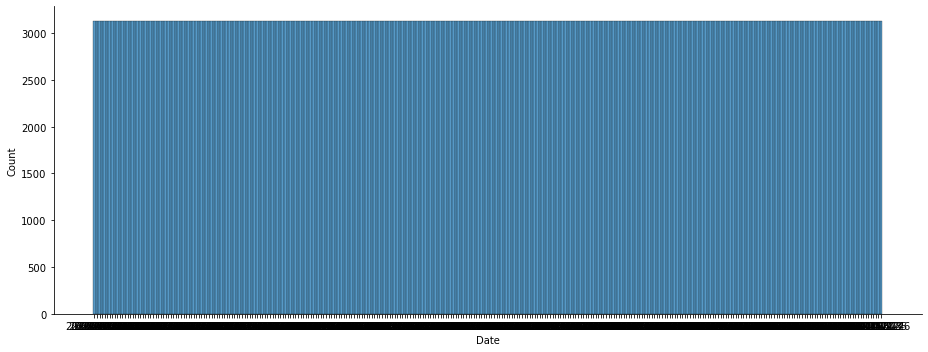

In [5]:
sns.displot(combined.Date, aspect=2.6)

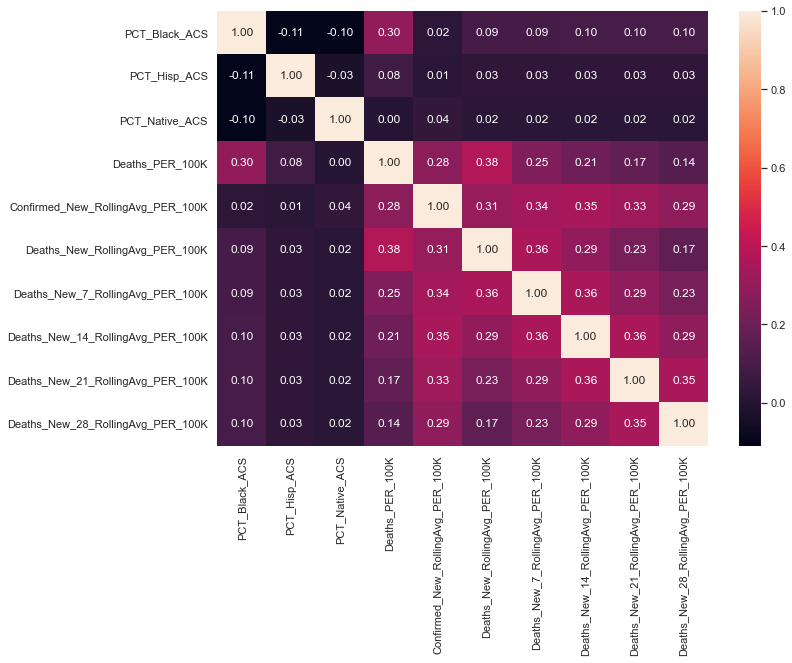

In [77]:

cols_subset = [i for i in combined_sample.columns if ("PER_100K" in i and "Rolling" in i) 
               or ("ACS" in i and "PCT" in i) or i == "Deaths_PER_100K"]
combined_sub = combined[cols_subset]

sns.set(rc={'figure.figsize':(11,8)})
corr = combined_sample_sub.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [78]:
combined.Deaths.isna().value_counts()

False    970300
Name: Deaths, dtype: int64

In [79]:
combined['Date'] = combined['Date'].astype("datetime64")

In [80]:
combined_sub = combined.drop(columns=['Unnamed: 0','Country/Region'])

In [81]:
combined_sub.Name.isna().value_counts()

False    970300
Name: Name, dtype: int64

In [82]:
combined_sub.locationcol.isna().value_counts()

False    970300
Name: locationcol, dtype: int64

In [83]:
combined_sub['Date'].isna().value_counts()

False    970300
Name: Date, dtype: int64

In [84]:
combined_sub['State Code'].isna().value_counts()

False    970300
Name: State Code, dtype: int64

## Examine per-county distributions

In [85]:
list_cols = list(combined_sub.columns)

list_cols = [i for i in list_cols if i not in ["Date","locationcol","State","State Code","Name","County_FIPS","Region","Division","Metro"]]
list_cols

['retail_and_recreation_PCT_CFB',
 'grocery_and_pharmacy_PCT_CFB',
 'parks_PCT_CFB',
 'transit_stations_PCT_CFB',
 'workplaces_PCT_CFB',
 'residential_PCT_CFB',
 'retail_and_recreation_PCT_CFB_RollingAvg',
 'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 'parks_PCT_CFB_RollingAvg',
 'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'HS_DIPLOMA_ONLY_2018',
 'SOME_COLLEGE_2018',
 'BACHELORS_PLUS_2018',
 'Poverty_PCT_2018',
 'UrbanCD',
 'Median_Income_2018',
 'Population_ACS',
 'Population_Black_ACS',
 'Population_Hisp_ACS',
 'Population_Native_ACS',
 'PCT_Black_ACS',
 'PCT_Hisp_ACS',
 'PCT_Native_ACS',
 'UrbanCD_Description',
 'Confirmed',
 'Deaths',
 'Deaths_Previous',
 'Confirmed_Previous',
 'Deaths_New',
 'Deaths_New_7',
 'Deaths_New_14',
 'Deaths_New_21',
 'Deaths_New_28',
 'Confirmed_New',
 'Confirmed_New_RollingAvg',
 'Deaths_New_RollingAvg',
 'Deaths_New_7_RollingAvg',
 'Deaths_New_14_RollingAvg',
 'Deaths_New_21_RollingAvg',


In [86]:
#county_desc = combined_sub[["locationcol","County_FIPS","State Code","Region","Division","Metro"]].drop_duplicates()
#county = pd.DataFrame(county) 
#county.reset_index(inplace=True)

county = combined_sub.groupby(["Name","County_FIPS","State Code","Region","Division","Metro"])[list_cols].mean()

In [87]:
county.reset_index(inplace=True)

In [88]:
county_samp = county.sample(frac=.1)

In [89]:
county.PCT_Hisp_ACS.describe()

count    3130.000000
mean        9.133991
std        13.733322
min         0.000000
25%         2.045633
50%         3.978203
75%         9.283641
max        99.184800
Name: PCT_Hisp_ACS, dtype: float64

In [90]:
county[county.Name.str.contains("Fairfax")]

,Name,County_FIPS,State Code,Region,Division,Metro,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,...,Deaths_New_14_PER_100K,Deaths_New_21_PER_100K,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K
893,Fairfax City|Virginia,51600,VA,South,South Atlantic,Large_metro,-32.362637,-9.455598,-39.833333,NaN,...,0.128946,0.132069,0.135347,2.868428,2.811259,0.11397,0.116272,0.119079,0.122024,0.125119


In [91]:
county.Deaths_PER_100K.describe()

count    3130.000000
mean       21.833247
std        26.736611
min         0.000000
25%         5.469716
50%        12.937551
75%        28.084217
max       263.736755
Name: Deaths_PER_100K, dtype: float64

In [92]:
county[(county.Deaths_PER_100K >= county.Deaths_PER_100K.mean()*10)]

,Name,County_FIPS,State Code,Region,Division,Metro,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,...,Deaths_New_14_PER_100K,Deaths_New_21_PER_100K,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K
274,Bronx|New York,36005,NY,Northeast,Middle Atlantic,Large_metro,-25.661972,-6.992958,-4.359155,-31.690141,...,1.166546,1.194801,1.224459,13.866202,13.897116,1.140438,1.163477,1.191561,1.221034,1.252002
1168,Hancock|Georgia,13141,GA,South,South Atlantic,Micropolitan,NaN,0.571429,NaN,NaN,...,1.793070,1.836501,1.882088,18.333873,18.131171,1.724447,1.759284,1.801750,1.846316,1.893143
2371,Randolph|Georgia,13243,GA,South,South Atlantic,Noncore_adjacent,-43.333333,NaN,NaN,NaN,...,1.406486,1.440553,1.476311,16.527040,16.756166,1.373993,1.401750,1.435585,1.471094,1.508405
2764,Terrell|Georgia,13273,GA,South,South Atlantic,Smaller_metro,-9.294118,-1.078431,NaN,NaN,...,1.241774,1.271852,1.303423,14.238329,14.431001,1.213086,1.237593,1.267466,1.298817,1.331758


In [93]:
county[county.Metro.isna() == True]

,Name,County_FIPS,State Code,Region,Division,Metro,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,...,Deaths_New_14_PER_100K,Deaths_New_21_PER_100K,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K


## Longitudinal graphs by county

In [94]:
import random 


In [95]:
bigh = combined_sub[combined_sub.County_FIPS == "04001"]
bigh.head(40)

,Date,County_FIPS,State Code,Name,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,workplaces_PCT_CFB,residential_PCT_CFB,...,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K,Region,Division
29450,2020-01-22,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
29451,2020-01-23,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
29452,2020-01-24,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
29453,2020-01-25,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
29454,2020-01-26,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
29455,2020-01-27,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
29456,2020-01-28,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,West,Mountain
29457,2020-01-29,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,West,Mountain
29458,2020-01-30,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,West,Mountain
29459,2020-01-31,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,West,Mountain


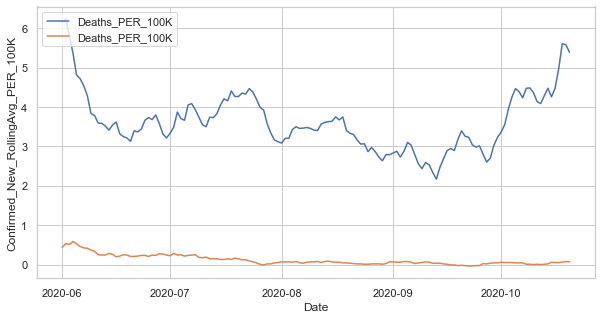

In [102]:
sns.set_style("whitegrid")


plt.figure(figsize=(10,5)) 
sns.lineplot(x="Date", y="Confirmed_New_RollingAvg_PER_100K", label="Deaths_PER_100K", data=bigh)
sns.lineplot(x="Date", y="Deaths_New_RollingAvg_PER_100K", label="Deaths_PER_100K", data=bigh)
plt.legend(loc="upper left")
plt.show()

In [97]:
combined_sub[combined_sub.Date.isna() == True]

,Date,County_FIPS,State Code,Name,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,workplaces_PCT_CFB,residential_PCT_CFB,...,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K,Region,Division


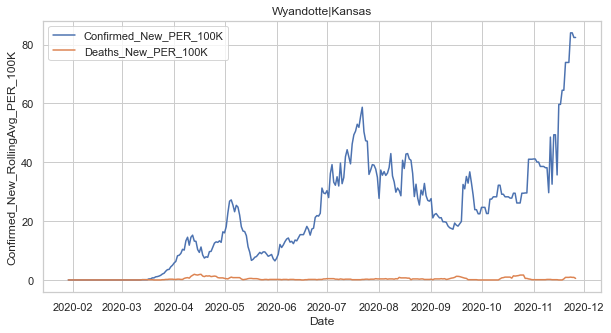

20209


In [128]:
sns.set_style("whitegrid")

u_FIPS = list(combined_sub.County_FIPS.unique())
random_FIPS =  random.choice(u_FIPS)

random_df = combined_sub[combined_sub.County_FIPS == random_FIPS]
random_name = combined_sub[combined_sub.County_FIPS == random_FIPS]['Name'].iloc[0]
random_state = combined_sub[combined_sub.County_FIPS == random_FIPS]['State'].iloc[0]

plt.figure(figsize=(10,5)) 
sns.lineplot(x="Date", y="Confirmed_New_RollingAvg_PER_100K", label="Confirmed_New_PER_100K", data=random_df)
sns.lineplot(x="Date", y="Deaths_New_RollingAvg_PER_100K", label="Deaths_New_PER_100K", data=random_df)
plt.legend(loc="upper left")
plt.title("{title}".format(title=random_name))
plt.show()
print(random_FIPS)

In [122]:
import random as random

list_counties = list(county[county.Population_ACS >= 100000].County_FIPS.unique())
list_random = random.choices(list_counties, k=4)

In [126]:
travis = combined_sub[combined_sub.Name=='Travis|Texas']
travis.to_csv("travis.csv")

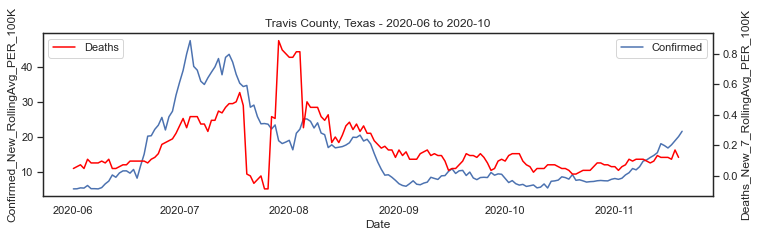

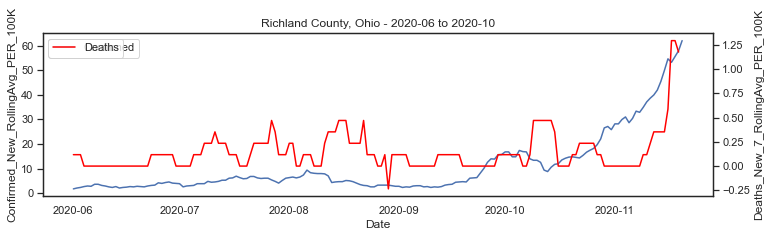

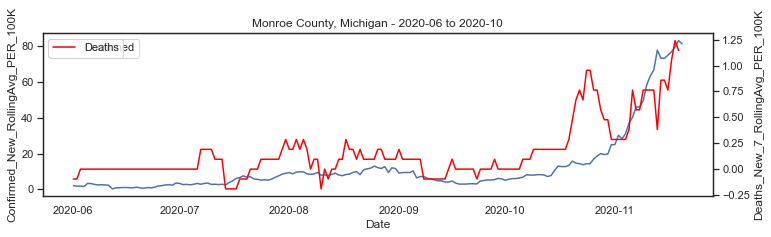

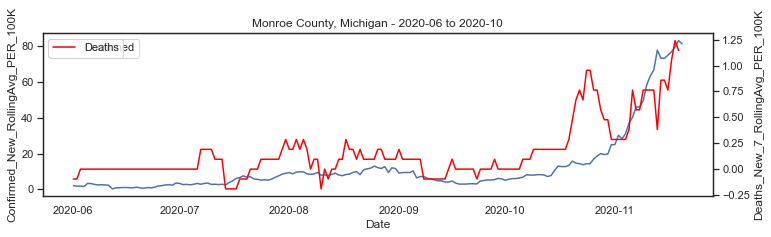

In [124]:
for i in list_random:
    sns.set_style("white")
    bigh = combined_sub[combined_sub.County_FIPS == i]
    bigh = bigh[bigh.Date <= '2020-11-20']
    bigh = bigh[bigh.Date >= '2020-06-01']
    name_county = bigh.Name.iloc[0]
    plt.figure(figsize=(12,3)) 
    ax = sns.lineplot(x="Date", y="Confirmed_New_RollingAvg_PER_100K", label="Confirmed", data=bigh)
    ax2 = ax.twinx()
    ax2 = sns.lineplot(x="Date", y="Deaths_New_7_RollingAvg_PER_100K", label="Deaths", color='red', data=bigh)
    plt.title("{x} - 2020-06 to 2020-10".format(x=name_county.replace('|',' County, ')))
    plt.legend(loc="upper left")
    plt.show()

In [ ]:
list_tup = []
for i in range(4,9):
    a = '2020-0{c}-01'.format(c=i)
    b = '2020-0{c}-01'.format(c=i+1)
    list_tup.append((a,b))

for i in range(10,11):
    a = '2020-{c}-01'.format(c=i)
    b = '2020-{c}-01'.format(c=i+1)
    list_tup.append((a,b))

## Make the county level dataframe population - weighted 

In [109]:
list_frame = []

from tqdm import tqdm

for i in tqdm(list(county.County_FIPS.unique())):
    frame = county[county.County_FIPS == i]
    frame['pop_1k'] = frame['Population_ACS']/1000 # Each row will represent 1k people
    frame['key'] = 'key'
    joinframe = pd.DataFrame(pd.Series(list(range(0,int(frame.pop_1k.max())))))
    joinframe['key'] = 'key'
    joinframe.columns = ['val','key']
    cartesian = frame.merge(joinframe, on="key")
    #frame_weighted = cartesian[cartesian.Deaths <= cartesian.val]
    list_frame.append(cartesian)

  0%|          | 0/3130 [00:00<?, ?it/s]/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
  2%|▏         | 78/3130 [00:00<00:12, 247.43it/s]/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series

In [110]:
frame_concat = pd.concat(list_frame)

In [115]:
frame_concat.shape[0]

315433

In [ ]:
plt.figure(figsize=(16,9)) 
frame = frame_concat
frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]
frame.sort_values(by="Metro", inplace=True)
#frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro"])]
frame = frame.sort_values(by="Metro")
#sns.violinplot(x="Metro", y="Deaths_PER_100K", label="work", data=frame, scale="count")
sns.boxplot(x="Metro", y="Deaths_PER_100K", data=frame,  boxprops={'facecolor':'None'}, fliersize=0)
sns.stripplot(x="Metro", y="Deaths_PER_100K", label="work", data=frame, size=2, alpha=.8, dodge=True, palette="viridis")
plt.show()


KeyboardInterrupt: 

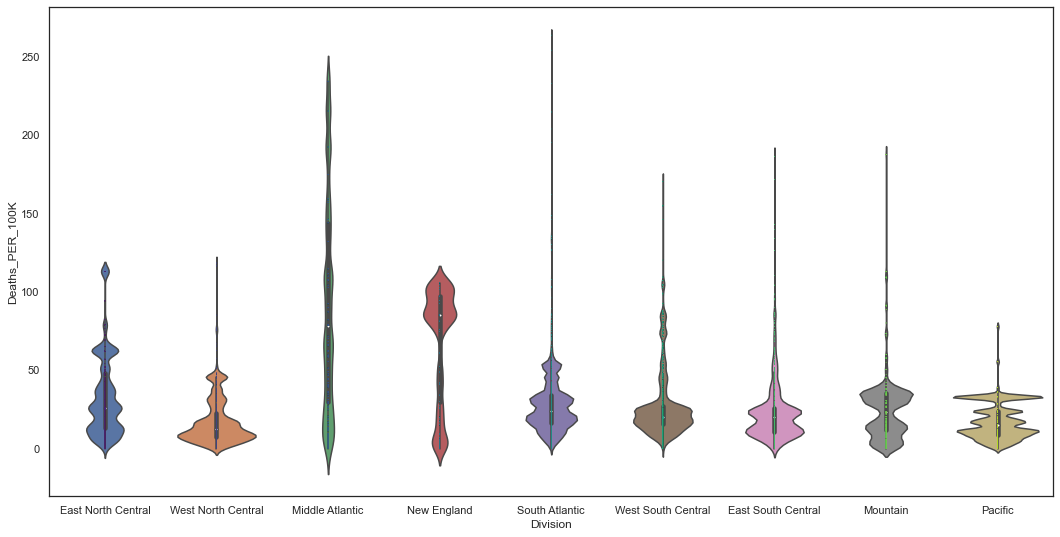

In [114]:
plt.figure(figsize=(18,9)) 
frame = frame_concat #.sample(frac=.25)
frame.sort_values(by="Division", inplace=True)
frame = frame.sort_values(by="Region")
sns.violinplot(x="Division", y="Deaths_PER_100K", label="work", data=frame)
#sns.boxplot(x="Division", y="Deaths_PER_100K", data=frame,  boxprops={'facecolor':'None'}, fliersize=0)
sns.swarmplot(x="Division", y="Deaths_PER_100K", label="work", data=frame, size=.5, alpha=.6, dodge=True, palette="viridis")
plt.show()


/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

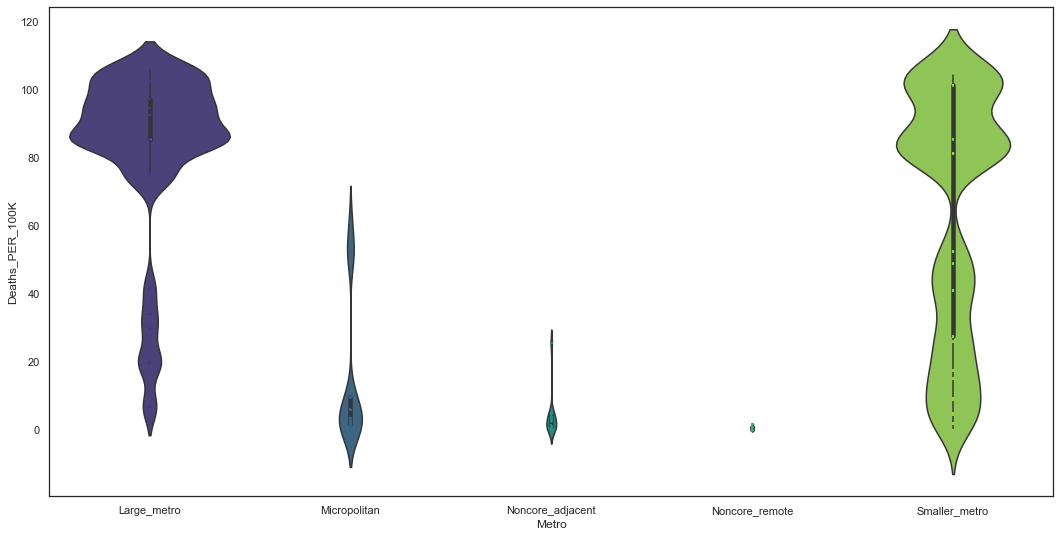

In [116]:
plt.figure(figsize=(18,9)) 
frame = frame_concat[frame_concat.Division == "New England"]
frame.sort_values(by="Metro", inplace=True)
ax = sns.violinplot(x="Metro", y="Deaths_PER_100K", label="work", palette="viridis", alpha=.2, scale="count", data=frame)
#sns.boxplot(x="Metro", y="Deaths_PER_100K", data=frame,  boxprops={'facecolor':'None'}, fliersize=0)
ax = sns.swarmplot(x="Metro", y="Deaths_PER_100K", label="work", data=frame, size=2, dodge=True, palette="viridis")
plt.setp(ax.collections, alpha=.3)
plt.show()


In [ ]:
import numpy as np
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

In [ ]:
def boxplot_with_violins(df, Yvar = "Deaths_PER_100K", group="Region"):
    frame = df
    frame = frame.sort_values(by=group)
    #frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]

    fig = plt.figure(figsize=(9,6))

    ax = sns.boxplot(x=group, y=Yvar, data=frame, boxprops={'facecolor':'None'}, fliersize=0)
    ax = sns.violinplot(x=group, y=Yvar, scale="count", data=frame, inner="quart", despine=True)

    plt.setp(ax.collections, alpha=.4)
    plt.ylim(-10,frame["{Yvar}".format(Yvar=Yvar)].max()*.95)

    adjust_box_widths(fig, 0.9)
    
    fig.show()

In [ ]:
def upper_limit(series):
    from scipy.stats import iqr
    import numpy as np
    Q3 = np.percentile(series, 75, interpolation = 'midpoint') 
    return int(Q3+(4*iqr(series)))

In [ ]:
def boxplot_with_violins_grp(df, Yvar = "Deaths_PER_100K",  group="Region"):
    frame = df
    frame = frame.sort_values(by=group)
    #frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]

    fig = plt.figure(figsize=(24,12))
    
    ax = sns.boxplot(x=group, y=Yvar, hue="Metro", data=frame, boxprops={'facecolor':'None'}, fliersize=0)
    ax = sns.violinplot(x=group, y=Yvar, hue="Metro", scale="count", data=frame, inner="quart", despine=True)

    #Make legend distinct 
    handles, labels = ax.get_legend_handles_labels()
    num_legend = len(df["{x}".format(x=group)].unique())
    plt.legend(handles[0:num_legend], labels[0:num_legend], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.setp(ax.collections, alpha=.4)
    
    #plt.ylim(-10,frame["{Yvar}".format(Yvar=Yvar)].max()*.75)
   
    upper_limit_number = upper_limit(frame["{Yvar}".format(Yvar=Yvar)])
    plt.ylim(-10,upper_limit_number)
    adjust_box_widths(fig, 0.8)
    #plt.legend()
    fig.show()

In [ ]:
boxplot_with_violins_grp(frame_concat,Yvar = "Confirmed_PER_100K")

In [ ]:
frame = frame_concat.sample(frac=.1)
#frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]
#plt.figure(figsize=(22,9)) 

fig = plt.figure(figsize=(22, 9))

ax = sns.boxplot(x="Region", y="Deaths_PER_100K", data=frame, boxprops={'facecolor':'None'}, fliersize=0)
ax = sns.swarmplot(x="Region", y="Deaths_PER_100K",  alpha=.95, data=frame, size=.75, dodge=True)
#plt.setp(ax.collections, alpha=.9)
plt.ylim(-10,frame.Deaths_PER_100K.max()*1.1)

adjust_box_widths(fig, 0.9)

In [ ]:
frame_concat.columns

In [ ]:
frame = frame_concat
frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]
#plt.figure(figsize=(22,9)) 

fig = plt.figure(figsize=(22, 9))

#ax = sns.boxplot(x="Division", y="Confirmed_New_RollingAvg_PER_100K", hue="Metro", data=frame, fliersize=0)
ax = sns.violinplot(x="Division", y="Confirmed_New_RollingAvg_PER_100K",  hue="Metro", scale="count", data=frame, inner="quart", size=2, dodge=True, despine=True)
plt.setp(ax.collections, alpha=.4)
plt.ylim(-10,150)

adjust_box_widths(fig, 0.9)

In [ ]:
pop = pd.DataFrame(frame.groupby(["Division"])["Population_ACS"].sum())

In [ ]:
pop['pop'] = pop.Population_ACS/1000000

In [ ]:
1.553625e+04

In [ ]:
frame = frame_concat.sample(frac=.1)
frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro"])]
#plt.figure(figsize=(22,9)) 

fig = plt.figure(figsize=(22, 9))

ax = sns.boxplot(x="Region", y="Deaths_New_7_RollingAvg_PER_100K", hue="Metro", data=frame, boxprops={'facecolor':'None'}, fliersize=0)
ax = sns.violinplot(x="Region", y="Deaths_New_7_RollingAvg_PER_100K",  hue="Metro", scale="count", data=frame, inner="quart", size=2, dodge=True, despine=True)
plt.setp(ax.collections, alpha=.4)
plt.ylim(-1,2.5)

adjust_box_widths(fig, 0.9)

In [ ]:
sns.distplot(frame.Deaths_New_7_RollingAvg_PER_100K)

In [ ]:
combined_sub['week_of_yr'] = combined_sub.date.dt.week

In [ ]:
cols = list(combined_sub.columns)

list_df = [] 

for i in tqdm(range(12,combined_sub.week_of_yr.max())):
    county = combined_sub[(combined_sub.week_of_yr == i)]
    date = county.date.max()
    county = county.groupby(["County_FIPS","Metro","Division","StateCD"])[cols].mean()
    county = pd.DataFrame(county)
    county['date'] = date
    county.reset_index(inplace=True)
    list_df.append(county)

In [ ]:
list_df[2] #.Metro

In [ ]:
def explode_df_pop_weight(df):
    list_frame  = []
    for i in tqdm(list(df.County_FIPS.unique())):
        frame = df[df.County_FIPS == i]
        frame['pop_1k'] = frame['Population_ACS']/1000 # Each row will represent 1k people
        frame['key'] = 'key'
        joinframe = pd.DataFrame(pd.Series(list(range(0,int(frame.pop_1k.max())))))
        joinframe['key'] = 'key'
        joinframe.columns = ['val','key']
        cartesian = frame.merge(joinframe, on="key")
        list_frame.append(cartesian)
    exploded_frame = pd.concat(list_frame)
    return exploded_frame

In [ ]:
exp = explode_df_pop_weight(list_df[2])

In [ ]:
list_exploded_df = [explode_df_dateweight(i) for i in list_df]

In [ ]:
colslist = list(list_exploded_df[2].columns)
Yvarlist = [i for i in colslist if "RollingAvg" in i]

In [ ]:
colslist

In [ ]:
Yvar_list = [
 #'retail_and_recreation_PCT_CFB_RollingAvg',
 #'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 #'parks_PCT_CFB_RollingAvg',
 #'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'Confirmed_New_RollingAvg_PER_100K',
 'Deaths_New_RollingAvg_PER_100K']

In [ ]:
grouplist = ['Metro','Region']

In [ ]:
import os
os.getcwd()
os.chdir("/Users/philip.ballentine/Documents/grphimg")

In [ ]:
#conda install -c conda-forge imageio

In [ ]:
def gif_from_images(animated_filename="movie.gif"):
    """ goes into the working directory (set earlier) and combined all images into an animated gif"""
    import imageio
    image_list = sorted(os.listdir(os.getcwd()))
    image_list_sub = [i for i in image_list if '2020' in i]
    images = []
    for filename in image_list_sub:
        images.append(imageio.imread(filename))
    imageio.mimsave(animated_filename+'.gif', images, duration=.5)

In [ ]:
combined_sub.columns

In [ ]:
combined_sub['retail_and_recreation_PCT_CFB'].quantile(.10)

In [ ]:
combined_sub['retail_and_recreation_PCT_CFB'].quantile(.9)

In [ ]:
def loop_for_gif_by_metro(Yvar="Deaths_PER_100K", group="Metro"):
    
    ## Creating file structure
    import os 
    foldername = "{Yvar}_by_{group}".format(Yvar=Yvar, group=group)
    try:
        os.chdir("/Users/philip.ballentine/Documents/grphimg/{foldername}".format(foldername=foldername))
    except:
        os.mkdir("/Users/philip.ballentine/Documents/grphimg/{foldername}".format(foldername=foldername))
        os.chdir("/Users/philip.ballentine/Documents/grphimg/{foldername}".format(foldername=foldername))
    
    ## Iterating through dataframes and creating the plots
    for i in tqdm(random.choices(list_exploded_df, k= 3)):
    #for i in tqdm(list_exploded_df): 
        frame = i
        frame = frame.sort_values(by='{group}'.format(group=group))
        fig = plt.figure(figsize=(9, 6))
        #frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro"])]
        ax = sns.boxplot(x=group, y=Yvar, data=frame, boxprops={'facecolor':'None'}, fliersize=0)
        ax = sns.violinplot(x=group, y=Yvar, scale="count", data=frame, inner="quart", dodge=True, despine=True)

        plt.setp(ax.collections, alpha=.4)
        ## Setting the Y-Lims
        #if "PCT" in Yvar:
            #plt.ylim(combined_sub['{Yvar}'.format(Yvar=Yvar)].min(),combined_sub['{Yvar}'.format(Yvar=Yvar)].max())
            #quant10 = combined_sub['{Yvar}'.format(Yvar=Yvar)].quantile(.1)
            #quant90 = combined_sub['{Yvar}'.format(Yvar=Yvar)].quantile(.9)
            #plt.ylim(quant10,quant90)
        #if "Confirmed" in Yvar: 
            #stdev = combined_sub['{Yvar}'.format(Yvar=Yvar)].std()
            #mean = combined_sub['{Yvar}'.format(Yvar=Yvar)].mean()
            #limits = ((mean-(stdev*3)),(mean+(stdev*3)))
            #quant10 = combined_sub['{Yvar}'.format(Yvar=Yvar)].quantile(.1)
            #quant90 = combined_sub['{Yvar}'.format(Yvar=Yvar)].quantile(.9)
            #plt.ylim(quant10,quant90)
       # else: 
            #stdev = combined_sub['{Yvar}'.format(Yvar=Yvar)].std()
            #plt.ylim(-1,combined_sub['{Yvar}'.format(Yvar=Yvar)].mean()+(5*stdev))
        
        ## Titles and file saving
        datestr = str(i.date.max())[0:11]
        plt.title("{datestr} - {Yvar} by {group}, Population Weighted".format(datestr=datestr, Yvar=Yvar, group=group))
        plt.tight_layout()
        plt.savefig("{datestr}.png".format(datestr=datestr), dpi=300)
        #print("{datestr}.png has been created in {foldername}".format(datestr=datestr, foldername=foldername))

## Animated GIF creation
    gif_from_images(animated_filename=foldername)

In [ ]:
loop_for_gif_by_metro("retail_and_recreation_PCT_CFB", group="Metro")

In [ ]:
all_combo_list = []
for i in Yvar_list:
    for x in grouplist:
        all_combo_list.append((i,x))

In [ ]:
all_combo_list

In [ ]:
for i in all_combo_list:
    try:
        loop_for_gif_by_metro(Yvar=i[0], group=i[1])
    except:
        print("failure for {x}".format(x=str(i)))
        continue